# Linguagem Natural Parte 1

## Explorando os dados

In [1]:
import pandas as pd

resenha = pd.read_csv("c:/imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [2]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste, = train_test_split(resenha.text_pt,
resenha.sentiment, random_state = 42)

In [3]:
# from sklearn.linear_model import LogisticRegression

# regressao_logistica = LogisticRegression()
# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)
# print(acuracia)

# ERRO DEVIDO A FALTA DE INTRABILIDADE DA BIBLIOTECA DO SKLEARN

ValueError: could not convert string to float: 'Embora o filme tenha sido apenas assim, o closed caption foi de longe o melhor que eu já vi! Na maioria das vezes, a ortografia é terrível e a legenda está fora de sincronia. Eu uso o closed captioning mesmo que eu possa ouvir bem, mas acho que muitos atores resmungam. Também muitas vezes a trilha sonora substitui o diálogo. Obrigado!'

In [4]:
print("Negativa \n")
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [5]:
print("Positivo \n")
print(resenha.text_pt[4902])

Positivo 

Eu temo que eu fiquei só para assistir a primeira hora deste filme, pois realmente me pareceu um lixo irracional e um desperdício de talento. Liv Tyler interpreta uma beleza sumptuosa, mas as suas habilidades de atuação ainda não estão suficientemente desenvolvidas para dar um real pontapé ao papel. Como ela lentamente seduz um barman em uma vida de crime, é difícil sentir qualquer preocupação real sobre qualquer um dos personagens. Até mesmo John Goodman apresenta suas linhas fracamente cômicas com uma ausência de brio, como se o humor sem graça devesse ser recitado lentamente, no caso de alguém perder a piada. O final é suposto ser bom, mas o curso inicial e principal deixou-me sem apetite para descobrir.


In [6]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [7]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [8]:
classificacao = resenha["sentiment"].replace(['neg','pos'], [0, 1])
classificacao.head()

0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [9]:
resenha["classificacao"] = classificacao

In [10]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [11]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


## bag of words - EXEM. Python

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme [ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)  # Vetorizando todos os comentários e vetorizando-os.
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [13]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [14]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
columns = vetorizar.get_feature_names())

In [15]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


## Bag of words - Aplicando em um caso real

In [16]:
vetorizar = CountVectorizer(lowercase = False, max_features = 50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [17]:
treino, teste, classe_treino, classe_teste, = train_test_split(bag_of_words,
resenha.sentiment, random_state = 42)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.6583097452486858


## Criando uma funções para classificar sentimentos

In [18]:
def Classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase = False, max_features = 50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

    treino, teste, classe_treino, classe_teste, = train_test_split(bag_of_words,
    texto[coluna_classificacao], random_state = 42)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
print(Classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


## Nessa aula aprendemos:

* Uma forma de vetorizar textos: o bag of words.

* Como usar python para criar o BOW.

* Como treinar e classificar os dados para Análise de Sentimento.

* Como medir os resultados da Análise de Sentimentos.

## WorldCLoud - conhecendo visualização

In [19]:
#instalando biblioteca do WordCloud
!pip install wordcloud

In [32]:
%matplotlib inline

from wordcloud import WordCloud # biblioteca de busca para palavras mais usadas nos comentários.

todas_palavras = ' '.join([texto for texto in resenha.text_pt])

nuvem_palavras = WordCloud().generate(todas_palavras)

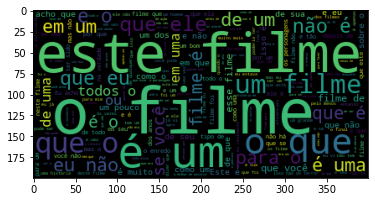

In [35]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

# WordCloud - Otimizando a visualização

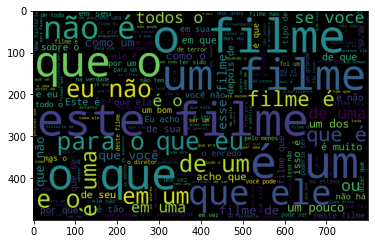

In [41]:
nuvem_palavras = WordCloud(width = 800, height = 500,
max_font_size = 110).generate(todas_palavras) # Width = largura da tela
                                              # Height = Altura da tela
                                              # Max_font_size = Menor tamanho de fonte a ser usado. Irá parar quando não houver mais espaço deste tamanho.

plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

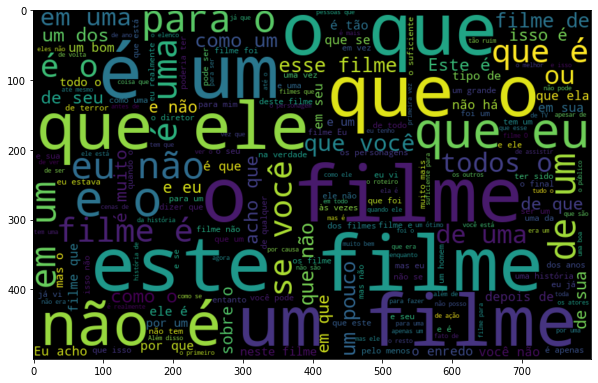

In [39]:
plt.figure(figsize = (10, 7)) # figsize = Tamanho da imagem
plt.imshow(nuvem_palavras, interpolation = 'bilinear') # interpolation='bilinear' = Deixa a imagem mais nitida                                                            para se ver 
plt.show()

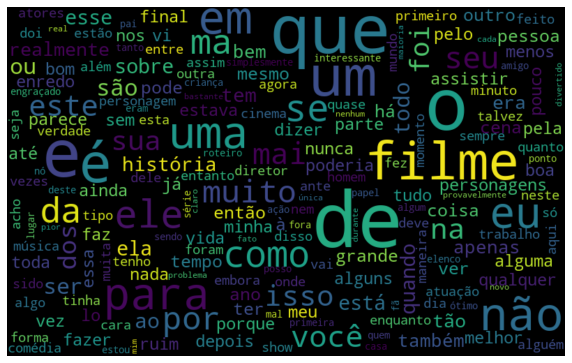

In [42]:
nuvem_palavras = WordCloud(width = 800, height = 500,
max_font_size = 110, collocations = False).generate(todas_palavras) #collocations = Coloca as palavras com maior números em destaques

plt.figure(figsize = (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis("off")
plt.show()

## Segregando entre negativo e positivo

In [43]:
resenha.query("sentiment == 'pos'") # .query = Consulta as colunas de um DataFrame com uma expressão booleana.

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [60]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")    
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palavras = WordCloud(width = 800, height = 500,
    max_font_size = 110, collocations = False).generate(todas_palavras)

    plt.figure(figsize = (10, 7))
    plt.imshow(nuvem_palavras, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

In [61]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")    
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palavras = WordCloud(width = 800, height = 500,
    max_font_size = 110, collocations = False).generate(todas_palavras)

    plt.figure(figsize = (10, 7))
    plt.imshow(nuvem_palavras, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

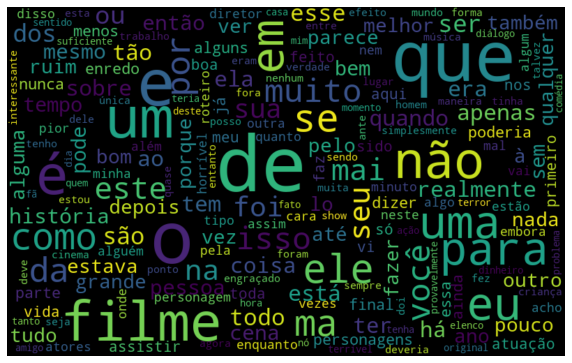

In [62]:
nuvem_palavras_neg(resenha, "text_pt")

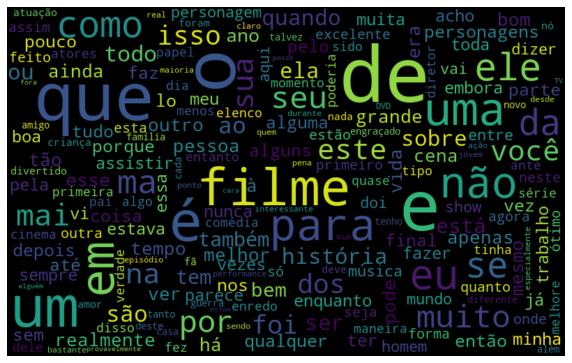

In [63]:
nuvem_palavras_pos(resenha, "text_pt")

## O que aprendemos nesta aula:

* O conceito do que é word cloud.
* Como usar a biblioteca WordCloud para criar nossa núvem de palavras.
* Como utilizar a word cloud na análise de sentimento.
* Como criar um novo banco apenas com sentimentos negativos ou positivos usando a função query do pandas.

## Conhecendo a biblioteca NLTK

In [64]:
import nltk

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\maico\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\maico\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\maico\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\maico\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\maico\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\maico\AppData\Roaming\nltk_data...
[nltk_

True

In [65]:
frase = ["um filme ruim", "um filme bom"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

## Tokenização - Explorando o conceito

In [70]:
from nltk import tokenize

frase = 'Bem vindo ao mundo do PLN!'

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


## Tokenização - aplicando no dataset

In [87]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [89]:
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                              "Frequência": list(frequencia.values())})


In [90]:
df_frequencia.head().

,Palavra,Frequência
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741


In [92]:
df_frequencia.nlargest(columns = "Frequência", n = 10) # nlargest = ordena as 10 palavras com maior frenquencia.

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


## Nessa aula aprendemos:

* O conceito de tokenização.

* Como aplicar a tokenização usando NLTK.

* Como calcular a frequência das palavras usando NLTK

## Pareto - criação e exploração

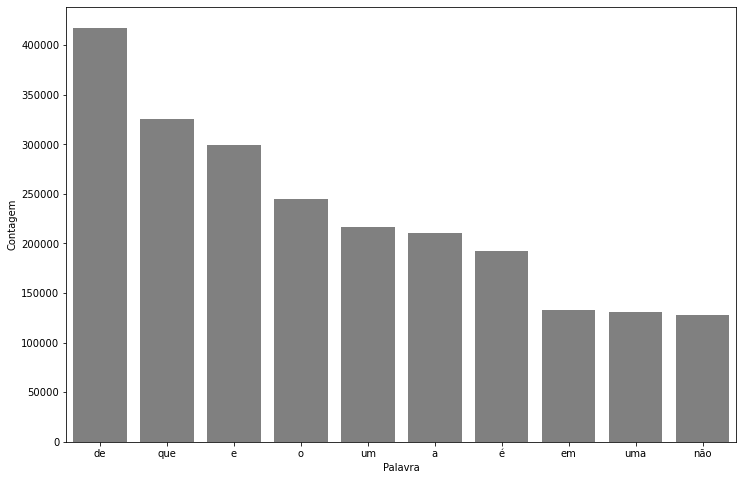

In [98]:
import seaborn as sns

df_frequenciadf_frequencia.nlargest(columns = "Frequência", n = 10)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

## Pareto - criando uma função

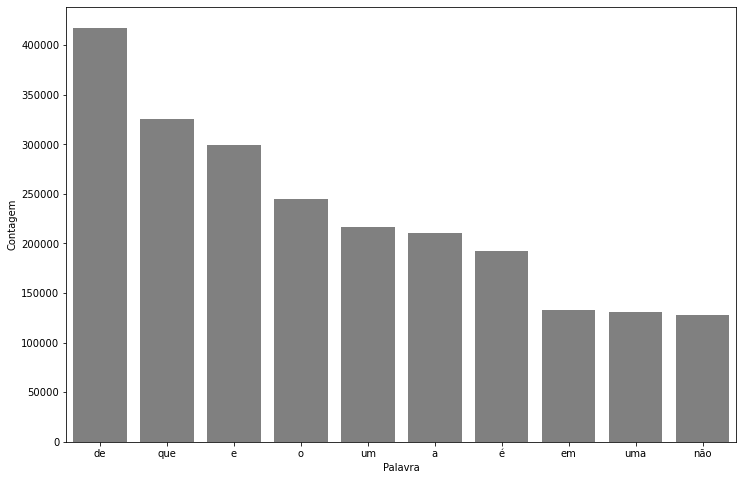

In [100]:
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                "Frequência": list(frequencia.values())})

    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

pareto(resenha, "text_pt", 10)

## Stop Words - Removendo o que não agrega

As stop words são palavras que não apresentam relevância em determinado contexto e podem ser removidas sem perda semântica da frase. Essa lista não é fixa e universal, podendo ser alterada dependendo do contexto e idioma.

In [104]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

In [108]:
frase_processada = list()
for opniao in resenha.text_pt:  # Tratamento de dados, fazendo um acesso de cada linha dentro da resenha.
    nova_frase = list()         # Removendo os stop words
    palavras_texto = token_espaco.tokenize(opniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_1"] = frase_processada

In [109]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [110]:
Classificar_texto(resenha, "tratamento_1", "classificacao")

0.6607359482410028

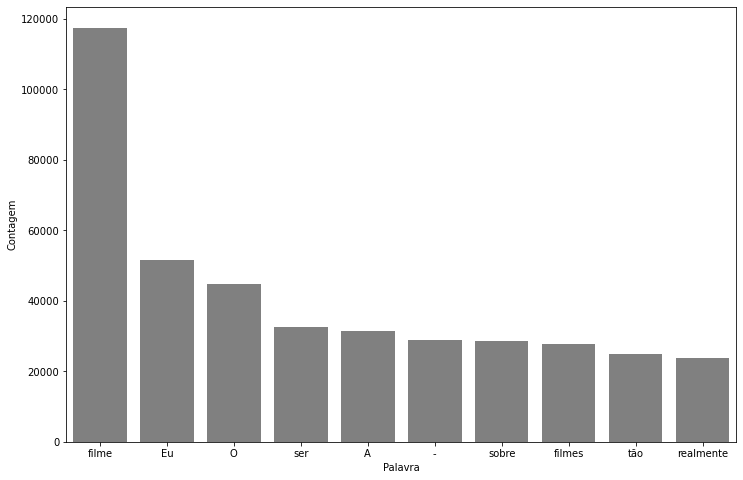

In [111]:
pareto(resenha, "tratamento_1", 10)

## Nessa aula aprendemos:

* Como construir um gráfico de Pareto usando a biblioteca seaborn.

* Como explorar os dados textuais com Pareto.

* Como importar uma lista de Stop Words usando o NLTK.